In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Data_Set.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[[   23 30000]
 [   27 76000]
 [   32 60000]
 [   37 33000]
 [   31 40000]
 [   24 73000]
 [   38 56000]
 [   29 48000]
 [   34 39000]
 [   31 80000]
 [   35 47000]
 [   26 59000]
 [   25 32000]
 [   32 47000]
 [   30 34000]]


In [5]:
print(y)

[0 1 1 0 0 1 0 1 0 0 0 1 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
print(x_train)

[[   30 34000]
 [   31 40000]
 [   32 60000]
 [   32 47000]
 [   35 47000]
 [   29 48000]
 [   26 59000]
 [   37 33000]
 [   23 30000]
 [   24 73000]
 [   25 32000]]


In [8]:
print(x_test)

[[   27 76000]
 [   38 56000]
 [   34 39000]
 [   31 80000]]


In [9]:
print(y_train)

[0 0 1 0 0 1 1 0 0 1 0]


In [10]:
print(y_test)

[1 0 0 0]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[ 0.12582184 -0.89226897]
 [ 0.3564952  -0.43575926]
 [ 0.58716857  1.08593975]
 [ 0.58716857  0.09683539]
 [ 1.27918867  0.09683539]
 [-0.10485153  0.17292034]
 [-0.79687163  1.0098548 ]
 [ 1.74053541 -0.96835392]
 [-1.48889173 -1.19660877]
 [-1.25821837  2.07504411]
 [-1.027545   -1.04443887]]


In [13]:
print(x_test)

[[-0.56619826  2.30329896]
 [ 1.97120877  0.78159995]
 [ 1.0485153  -0.51184421]
 [ 0.3564952   2.60763876]]


In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 1]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


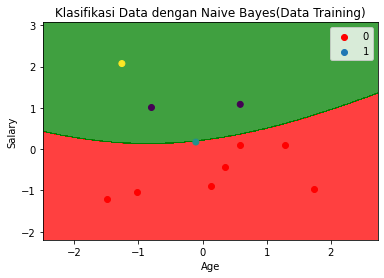

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Training)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()